In [1]:
import numpy as np
%tensorflow_version 2.x
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
#%matplotlib widget
import matplotlib.pyplot as plt
#plt.style.use('./deeplearning.mplstyle')
from keras.datasets import mnist
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

#from public_tests import * 


np.set_printoptions(precision=2)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
def my_softmax(z):  
    """ Softmax converts a vector of values to a probability distribution.
    Args:
      z (ndarray (N,))  : input data, N features
    Returns:
      a (ndarray (N,))  : softmax of z
    """    
    ### START CODE HERE ### 
    ez = np.exp(z)              #element-wise exponenial
    a = ez/np.sum(ez)
    print("ez = ",ez)
    print("sum = ",np.sum(ez))
    print("a = ",a)
    #return(sm)
    ### END CODE HERE ### 
    return a

In [3]:
z = np.array([1., 2., 3., 4.])
a = my_softmax(z)
atf = tf.nn.softmax(z)
print(f"my_softmax(z):         {a}")
print(f"tensorflow softmax(z): {atf}")

 

ez =  [ 2.72  7.39 20.09 54.6 ]
sum =  84.7910248837216
a =  [0.03 0.09 0.24 0.64]
my_softmax(z):         [0.03 0.09 0.24 0.64]
tensorflow softmax(z): [0.03 0.09 0.24 0.64]


11490434/11490434 [==============================] - 0s 0us/step
<class 'numpy.ndarray'>
(60000, 28, 28) (60000,)
(60000, 28, 28) (60000,)


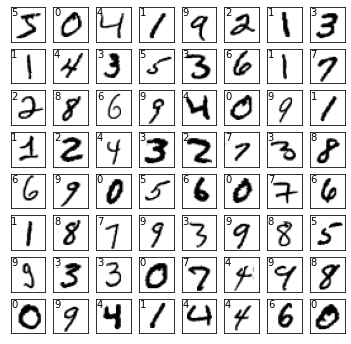

In [4]:
#plt.close("all")
(xh,yh),(xt,yt) = mnist.load_data()
print(type(xh[0]))
fig = plt.figure(figsize=(6,6))
print(xh.shape,yh.shape)
for i in range(64):
  ax = fig.add_subplot(8,8,i+1,xticks=[],yticks=[])
  ax.imshow(xh[i],cmap = "binary")
  ax.text(0,7,str(yh[i]))
print(xh.shape,yh.shape)


In [5]:
model = Sequential(
    [               
        ### START CODE HERE ### 
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        Dense(125,activation='relu',name='L1'),
        Dense(80,activation='relu',name='L2'),
        Dense(30,activation='relu',name='L3'),
        Dense(10,activation='linear',name='L4')
        ### END CODE HERE ### 
    ]
)

In [6]:
import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ['accuracy'],
)
print(xh.shape,yh.shape)
#xh = np.expand_dims(xh,-1)
#xh = xh.astype(np.float32)/255.
#yh = keras.utils.to_categorical(yh)
print(xh.shape,yh.shape)
his = model.fit(xh,yh,epochs=20,validation_split=0.3)
model.summary()

(60000, 28, 28) (60000,)
(60000, 28, 28) (60000,)
Epoch 1/20
1313/1313 [==============================] - 15s 11ms/step - loss: 1.2769 - accuracy: 0.8184 - val_loss: 0.3726 - val_accuracy: 0.8996
Epoch 2/20
1313/1313 [==============================] - 17s 13ms/step - loss: 0.3063 - accuracy: 0.9171 - val_loss: 0.2624 - val_accuracy: 0.9294
Epoch 3/20
1313/1313 [==============================] - 9s 7ms/step - loss: 0.2131 - accuracy: 0.9418 - val_loss: 0.2058 - val_accuracy: 0.9432
Epoch 4/20
1313/1313 [==============================] - 10s 7ms/step - loss: 0.1731 - accuracy: 0.9505 - val_loss: 0.2151 - val_accuracy: 0.9413
Epoch 5/20
1313/1313 [==============================] - 9s 7ms/step - loss: 0.1432 - accuracy: 0.9580 - val_loss: 0.1723 - val_accuracy: 0.9526
Epoch 6/20
1313/1313 [==============================] - 10s 7ms/step - loss: 0.1283 - accuracy: 0.9625 - val_loss: 0.2296 - val_accuracy: 0.9382
Epoch 7/20
1313/1313 [==============================] - 10s 7ms/step - loss: 0.1

In [7]:
predictions = model.predict(xt)

313/313 [==============================] - 1s 2ms/step


In [8]:
score = model.evaluate(xh,yh)
print(score)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0693 - accuracy: 0.9843
[0.06925629824399948, 0.9842833280563354]


[ -68.02  -30.16  -22.73  -25.34  -87.78  -26.05 -130.34   -5.01  -44.77
  -21.94]
7
7


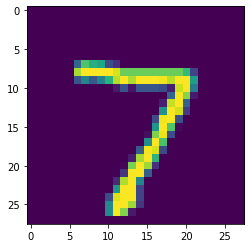

In [9]:
print(predictions[0])
pred = np.argmax(predictions,axis = -1)
print(pred[0])
plt.imshow(xt[0])
print(yt[0])